## Exam 1
## Author: Diego Cardenas
## Special Thanks: 



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [3]:
file_location = 'https://joannabieri.com/introdatascience/data/lego_sample.csv'
DF = pd.read_csv(file_location)

In [98]:
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


**Problem 1**

A) How many variables and observations in the data set<br>
B) What are the names of all the variables<br>
C) For each variable talk about whether you think that variable is Numerical or Categorical and what type of data it is<br>
D) Use describe to get some basic statistics about the numerical data. Comment on at least four things that you learned by looking at these statistic

In [11]:
#A
print("Variables: " , len(DF.columns))
print("Observations: ", len(DF))

Variables:  14
Observations:  75


In [13]:
#B
(DF.columns)

Index(['item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price',
       'year', 'ages', 'pages', 'minifigures', 'packaging', 'weight',
       'unique_pieces', 'size'],
      dtype='object')

### C 
**Item Number** This will be a Categorical because it is not quantitative but more of a name to identify itself   
**Set Name** This is a categorical variable because it is the name of the lego set<br>
**Theme** A categorical variable for the theme names<br>
**Pieces** Numerical because the amount of pieces is quantitative<br>
**Price** Numerical because it is quantitative and continuous<br>
**Amazon Price** Same as Price quantitative and continuous<br>
**Year** Numerical for being continuous<br> 
**Ages** Numerical since it is a continuous numerical variable<br>
**Pages** The amount of pages of a build booklet and that makes it continuous<br>
**Minifigures** The amount of minifigures in a lego set which is Discrete<br>
**Packaging** Categorical as it is a Nominal variables<br>
**Weight** Numerical as it is a Continuous variables<br> 
**Unique Pieces** A discrete numerical variable<br>
**Size** A categorical variable since it is a Nominal variable<br>


In [15]:
#D
DF.describe()

,item_number,pieces,price,amazon_price,year,pages,minifigures,unique_pieces
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,65.000000,75.000000
mean,37498.493333,196.453333,32.136667,39.393733,2019.053333,73.213333,2.615385,96.666667
std,20461.267542,213.914121,27.747263,33.301259,0.820239,76.949842,2.133749,89.471018
min,10859.000000,6.000000,4.990000,6.290000,2018.000000,1.000000,1.000000,5.000000
25%,10916.500000,37.000000,9.990000,17.980000,2018.000000,14.000000,1.000000,30.000000
50%,41378.000000,93.000000,19.990000,29.990000,2019.000000,44.000000,2.000000,61.000000
75%,60193.000000,323.500000,39.990000,53.935000,2020.000000,116.000000,3.000000,151.000000
max,60267.000000,897.000000,149.990000,184.990000,2020.000000,389.000000,15.000000,411.000000


1. The average can be seen to be higher for the amazon price then the regular price
2. The lego set with the most pieces is 897 pieces
4. Almost all the variables used are numerical. Maybe my absuption of item_number being categorical may be wrong.
5. My absuption for weight being numerical value would assume it would be part of the describe 

# Problem 2

A) Display (or show) the data frame with only the columns that contain useful categorical information. If you left any columns say why.<br>
B) For each categorical column that you chose above, find the frequencies of the categories. Talk about what you from the results of each calculation

In [16]:
DF.dtypes

item_number        int64
set_name          object
theme             object
pieces             int64
price            float64
amazon_price     float64
year               int64
ages              object
pages              int64
minifigures      float64
packaging         object
weight            object
unique_pieces      int64
size              object
dtype: object

In [18]:
cat_DF = DF.select_dtypes(include=['object', 'category'])
show(cat_DF)

Loading ITables v2.5.2 from the internet... (need help?)


These are all entries that use no numerical only input. Like Item_number which may show its item number for its lego set is not considered as an object 

# 2B

In [34]:
setName_DF = DF['set_name'].value_counts()
show(setName_DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [41]:
theme_DF = DF['theme'].value_counts()
show(theme_DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [40]:
ages_DF = DF['ages'].value_counts()
show(ages_DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [32]:
pack_DF = DF['packaging'].value_counts()
show(pac

Loading ITables v2.5.2 from the internet... (need help?)


In [35]:
weight_DF = DF['weight'].value_counts()
show(weight_DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [36]:
size_DF = DF['size'].value_counts()
show(size_DF)

Loading ITables v2.5.2 from the internet... (need help?)


# Problem 3

A) Make a scatter plot of the numer of pieces vs the price. Color the data by the lego them and add teh set name as your hover data<br>
B) Answer the three questions by describing what you see in the graph.

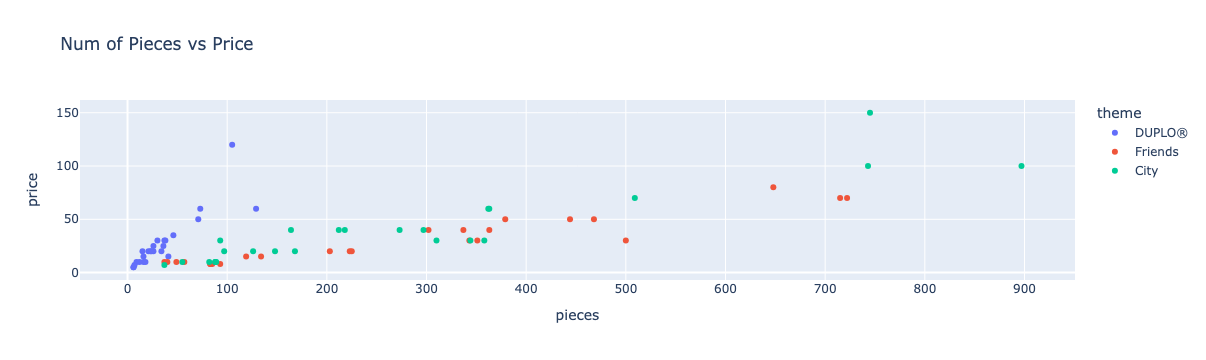

In [44]:
#A
fig = px.scatter(DF, 
                 x = 'pieces',
                 y = 'price',
                 title = 'Num of Pieces vs Price', 
                 hover_data = 'set_name',
                 color = 'theme')
fig.show()

**B**

1. Generally, the amount of pieces correlates with the price. The more expensive it is then the more peices the set will have
2. The most expensive set is the Ocean Exploration Ship that is $149.99
3. Duplo is typically the theme with the least amount of pieces and Friends and City theme typuically are about the same with price and pieces numbers

# Problem 4

A) Create a new column in the data frame that measures the price difference between Amazon and Retail<br>
B) Group the data by Lego Theme and use describe to do statistics on the price difference column you created in part (a). Comment on at least four things that you learned by looking at these statistics<br>
C) Make a histogram of the price difference and color the bars by the Lego Theme

In [48]:
#A
DF['price_diff'] = DF['amazon_price'] - DF['price']
show(DF['price_diff'])
#If the calculation is positive then the amazon price is more expensive then retail

Loading ITables v2.5.2 from the internet... (need help?)


In [61]:
theme_desc = DF.groupby(by=['theme'])['price_diff'].describe()
show(theme_desc)

Loading ITables v2.5.2 from the internet... (need help?)


1. The most money saved on a lego set is 13.99 if bought on amazon.
2. $115 is the most overpriced lego set compared from retail
3. On average buying on amazon is not the best deal
4. Over 50% you do not save any money when buying on amazon

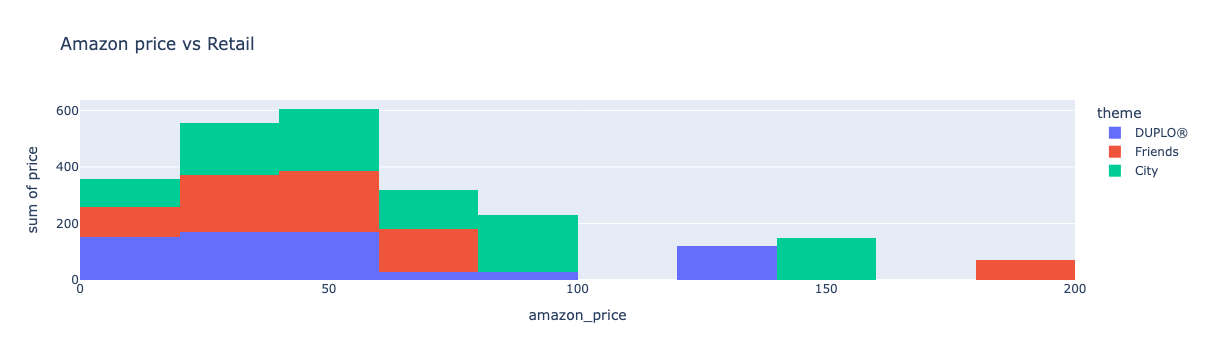

In [62]:
fig = px.histogram(DF,
                  x = 'amazon_price',
                   y = 'price',
                  color = 'theme',
                  title = 'Amazon price vs Retail')
fig.show()

# Problem 5

A) What was the most expensive set based on Retail price? Show the full data frame information for this observation. Comment on your results comparing Amazon and Retail, number of pieces or minifigs, etc <br>
B) What was the most expensive set based on Amazon price? Show the full data frame information for this observation<br>
C) How many sets were above $100 on either Retail or Amazon? Show the full data frame information for these observations. Comment on any observations for these sets.

In [74]:
my_col = ['set_name','price', 'amazon_price', 'pieces', 'minifigures']
priceDF = DF[my_col].groupby(by=['price']).max()
show(priceDF.sort_values(by='price',ascending=False))
#We see that Ocean Exploration ship is the most expensive retail set

Loading ITables v2.5.2 from the internet... (need help?)


In [75]:
my_col = ['set_name','price', 'amazon_price', 'pieces', 'minifigures']
priceDF = DF[my_col].groupby(by=['amazon_price']).max()
show(priceDF.sort_values(by='price',ascending=False))
#We see that Ocean Exploration ship is also the most expensive for the amazon price

Loading ITables v2.5.2 from the internet... (need help?)


In [78]:
mask100 = (DF['price'] >= 100) | (DF['amazon_price'] >= 100)
price100DF = DF[mask100]
show(price100DF)
# There are only 3 sets in the data that are over $100 but for one set it is less than $100 for the retail but goes up to 
# $184.99 as the amazon price

Loading ITables v2.5.2 from the internet... (need help?)


# Problem 6

**6A)** On average is the price of Legos increasing, decreasing, or staying the same over the three years?

In [85]:
my_col = ['price', 'amazon_price', 'theme', 'year', 'price_diff']
mask_yr18 = (DF['year'] == 2018)
DF_yr18 = DF[mask_yr18]
show(DF_yr18[my_col].describe())


Loading ITables v2.5.2 from the internet... (need help?)


In [86]:
my_col = ['price', 'amazon_price', 'theme', 'year', 'price_diff']
mask_yr19 = (DF['year'] == 2019)
DF_yr19 = DF[mask_yr19]
show(DF_yr19[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


In [87]:
my_col = ['price', 'amazon_price', 'theme', 'year', 'price_diff']
mask_yr20 = (DF['year'] == 2020)
DF_yr20 = DF[mask_yr20]
show(DF_yr20[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


**We can see that the average was about the same from 2018 to 2019 but then jumped by a whole $10 more in 2020 compared to 2018 and 2019**

**6B)** On average are the number of pieces increase, decreasing, or staying the same over the three years

In [92]:
my_col = ['year', 'pieces']
mask_yr18 = (DF['year'] == 2018)
DF_yr18 = DF[mask_yr18]
show(DF_yr18[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


In [93]:
my_col = ['year', 'pieces']
mask_yr19 = (DF['year'] == 2019)
DF_yr19 = DF[mask_yr19]
show(DF_yr19[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


In [91]:
my_col = ['year', 'pieces']
mask_yr20 = (DF['year'] == 2020)
DF_yr20 = DF[mask_yr20]
show(DF_yr20[my_col].describe())

Loading ITables v2.5.2 from the internet... (need help?)


**We see that the average amount of pieces are steadily increasing through the year of 2018 - 2020**

**6C)** Which set has the most minifigures and how many sets have zero or an unknown number of minifigures?

In [97]:
my_col = ['set_name', 'minifigures']
miniFigDF = DF[my_col].groupby(by='minifigures').max()
show(miniFigDF.sort_values(by='minifigures', ascending=False))
# The lego set with the most minifigures is People Pack - Outdoor Adventures

Loading ITables v2.5.2 from the internet... (need help?)


In [99]:
zeroCount = DF['minifigures'].isnull().sum()
print(f"The number of sets with no minifigures is {zeroCount}")

The number of sets with no minifigures is 10


# Problem 7

# I want to buy some Legos for my 6 year old cousin, which Lego set is the best deal?
1. First you will have to describe in words what makes a good deal. Is is price per piece, price per minifig, price per number of unique pieces, price per page, is it some combination of these things? Should you use Retail or Amazon Price?
2. Then you will have to decide what age ranges are appropriate and select just that data
3. Then you will need to do a calculation and add that column to your data frame.
4. Finally sort your deal column to find the best purchase